Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [261]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [262]:
deci_tree_data=pd.read_csv("heart_disease.xlsx - Heart_disease.csv")
deci_tree_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [263]:
# check for missing values 
deci_tree_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [264]:
deci_tree_data.dropna(inplace=True)

In [265]:
# check for duplicates value 
deci_tree_data.duplicated().sum()

0

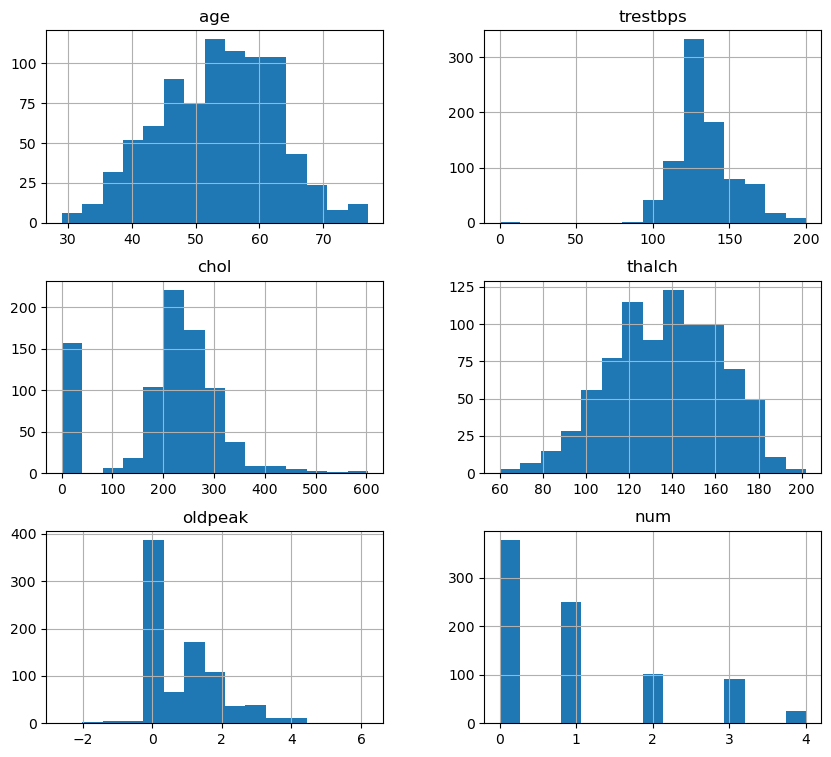

In [266]:
#histogram for numerical features 
deci_tree_data.hist(bins=15,figsize=(10,9))
plt.show()

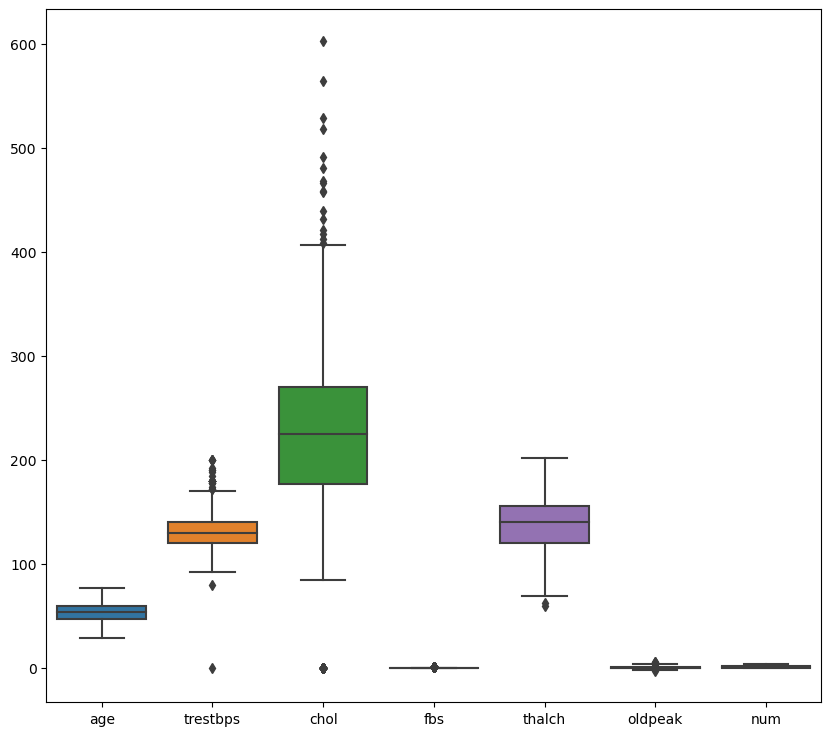

In [267]:
# boxplot for numerical features 
plt.figure(figsize=(10,9))
sns.boxplot(data=deci_tree_data)
plt.show()

<Axes: >

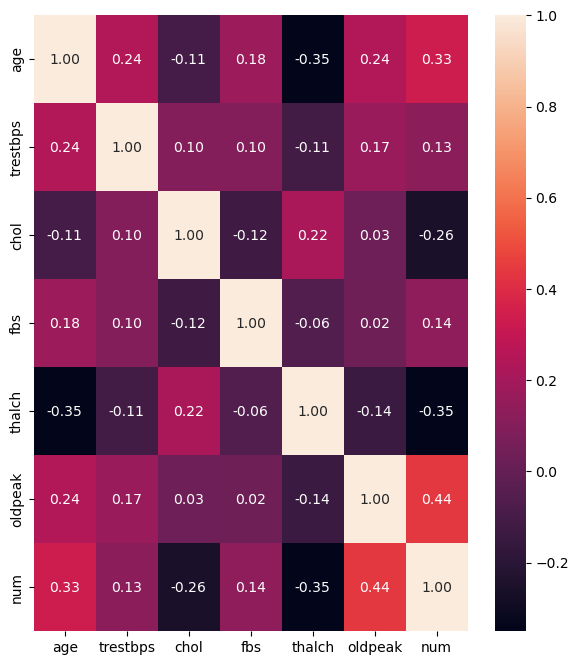

In [268]:
# correlation matrix 
plt.figure(figsize=(7,8))
sns.heatmap(deci_tree_data.corr(),annot=True,fmt='.2f')

In [269]:
# remove outliers using Isolation forest 
Iso_for=IsolationForest(contamination=0.01,random_state=42)

# detect the outliers  
Outliers=Iso_for.fit_predict(deci_tree_data.select_dtypes(include=[np.number]))

# True(1) for Inliers & False(-1) for Outliers 
Outliers_rows= Outliers == -1

# remove the outliers 
data_cleaned=deci_tree_data[~Outliers_rows]

# print the number of rows removed 
print("Number of rows removed:-",{sum(Outliers_rows)})

# Print the data_cleaned shape
print("Shape of cleaned dataset:-",{data_cleaned.shape})



Number of rows removed:- {9}
Shape of cleaned dataset:- {(837, 13)}


In [316]:
# split features & target 
features = pd.DataFrame(data_cleaned.drop("thal",axis=1))
target=data_cleaned["thal"]

In [317]:
# applying one hot encoding to categorical column
features_encoded=pd.get_dummies(features,drop_first=True)

# applying label encoding to target column
target=pd.get_dummies(target)

In [318]:
#standarize the features
sta_sca=StandardScaler()
features=sta_sca.fit_transform(features_encoded)

In [319]:
# split the training & testing model 
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(669, 16)
(168, 16)
(669, 3)
(168, 3)


In [362]:
# applying the decision tree model
dec_tree=DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_split=3)

In [363]:
# train the model 
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)

In [364]:
# appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve

In [365]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:-",accuracy)
precision = precision_score(y_test, y_pred,average='weighted')
print("Precision:-",precision)
recall = recall_score(y_test, y_pred,average='weighted')
print("Recall:-",recall)
F1 = f1_score(y_test, y_pred,average='weighted')
print("f1_score:-",F1)

Accuracy:- 0.3869047619047619
Precision:- 0.4000242605653054
Recall:- 0.3869047619047619
f1_score:- 0.3925538450126208


#Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [345]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'criterion':["gini","entropy","log_loss"]
}

In [346]:
grid_search=GridSearchCV(dec_tree,params,verbose=2)

In [347]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1083 candidates, totalling 5415 fits
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=13),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=2)

In [348]:
best_params=grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2}
